#Predictive Analysis: Pencurian Listrik

---
(oleh: [Emil Reginald Bowo](https://www.linkedin.com/in/emilrbowo/))
###Deskripsi Proyek
Tujuan dari proyek ini adalah untuk mengembangkan model machine learning yang bisa memprediksi apakah pelanggan melakukan pencurian listrik dengan input penggunaan listrik mereka selama 1 bulan.




##1. Import Library yang digunakan

In [ ]:
!pip install pyloras
import pyloras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import f1_score, roc_auc_score, classification_report
from sklearn.impute import SimpleImputer
from xgboost import XGBClassifier
import seaborn as sns

## 2. Data Understanding
### 2.1 Data Loading
Untuk data sendiri didapat dari kaggle dengan judul "SGCC Electricity Theft Detection" yaitu dataset imbalance mengenai pencurian listrik. Dataset berasal dari [Kaggle](https://www.kaggle.com/datasets/bensalem14/sgcc-dataset/data)
#### Informasi Dataset

| **Jenis**     | **Keterangan**                                                                                     |
|---------------|----------------------------------------------------------------------------------------------------|
| **Title**     | SGCC Dataset                                                                                       |
| **Source**    | Kaggle                                                                                             |
| **Maintainer**| Bensalem14                                                                                         |
| **License**   | Database Contents License (DbCL) v1.0                                                              |
| **Visibility**| Publik                                                                                             |
| **Tags**      | Tabular, Energy, Government, Electricity, Binary Classification, China                              |
| **Usability** | 10.00           
Kita download dulu datanya.


In [ ]:
import kagglehub

# Download latest version
path = kagglehub.dataset_download("bensalem14/sgcc-dataset")

print("Path to dataset files:", path)

100%|██████████| 51.2M/51.2M [00:00<00:00, 58.2MB/s]

Extracting files...


Path to dataset files: /root/.cache/kagglehub/datasets/bensalem14/sgcc-dataset/versions/1


In [ ]:
# Path to the CSV file
file_path = "/root/.cache/kagglehub/datasets/bensalem14/sgcc-dataset/versions/1/datasetsmall.csv"

# Load the CSV into a DataFrame
df = pd.read_csv(file_path)

### 2.2 Exploratory Data Analysis (EDA)
#### 2.2.1 EDA - Deskripsi Variabel

In [ ]:
df

,01/01/2014,01/02/2014,01/03/2014,01/04/2014,01/05/2014,01/06/2014,01/07/2014,01/08/2014,01/09/2014,01/10/2014,...,1/19/2014,1/20/2014,1/21/2014,1/22/2014,1/23/2014,1/24/2014,1/25/2014,1/26/2014,CONS_NO,FLAG
0,2401.00,2500.00,2674.00,2432.00,2231.00,1942.00,2752.00,1244.00,2069.00,2360.00,...,1774.00,2089.00,1300.00,2419.00,2462.00,1177.00,340.00,2272.00,A0E791400CF1C48C43DC26A68227854A,1
1,3318.00,282.00,540.00,5670.00,4854.00,4170.00,4848.00,3546.00,4416.00,3966.00,...,3876.00,3228.00,3054.00,3840.00,1422.00,1956.00,1380.00,96.00,B415F931D3BFB17ACEF48BC648B04FC2,1
2,1020.80,1097.40,1377.40,1408.80,1414.80,1387.40,1444.60,1325.00,1461.60,1253.20,...,1214.60,1285.40,1279.60,1188.60,1362.60,1286.00,1267.60,1444.00,DE8E1EAE4E578C0CEF92D1E23499888F,1
3,0.00,1183.80,1190.40,1183.80,0.00,1154.40,1166.40,1183.80,1169.40,1174.20,...,0.00,1072.80,1090.80,1090.20,1101.00,1079.40,1121.40,1145.40,2952491E940C9040B188B3C9095910D6,0
4,1445.70,1348.20,1281.90,1276.35,1219.95,1289.85,1298.55,1326.15,1410.60,1376.70,...,1331.85,1392.90,1213.20,1463.10,1405.50,1240.05,1190.25,1455.45,DBEED8FD0E7F5E0D1BAF1F86F4983459,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
25858,114.75,91.60,120.07,132.85,114.44,124.04,101.42,101.06,94.22,146.30,...,127.19,144.75,137.79,119.00,113.24,125.57,120.00,106.20,75B68BB33C5E9570705D551DED450E96,0
25859,0.00,107.20,97.80,85.40,0.00,0.00,0.00,0.00,0.00,0.00,...,112.50,150.40,0.00,134.70,0.00,0.00,75.80,0.00,522CD12E4FD07B23C55E2E2F475D4AB0,1
25860,148.40,159.86,157.20,104.80,118.17,176.44,171.94,171.19,168.89,174.02,...,0.00,119.24,106.21,115.07,131.66,104.25,103.04,75.75,970130CABEA2DD1B3C99E853331BC93F,0
25861,7.78,7.15,8.25,8.87,12.00,7.90,5.34,9.73,9.88,5.29,...,7.31,7.95,9.66,5.14,6.56,6.09,5.88,7.09,35244DA0EC3E6B58E3EF26CFF1D55CE1,1


Dapat kita lihat bahwa pada dataset terdapat kolom berisi penggunaan listrik pelanggan selama sebulan, kemudian ada nomor konsumen. Di kolom terakhir ada Flag, dimana apabila Flag bernilai 1 maka pelanggan itu melakukan pencurian listrik, sementara apabila 0 maka tidak ada pencurian. Karena nomer konsumen tidak penting, kita drop kolom tersebut

In [ ]:
df = df.drop(columns=['CONS_NO'])

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25863 entries, 0 to 25862
Data columns (total 27 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   01/01/2014  25863 non-null  float64
 1   01/02/2014  25861 non-null  float64
 2   01/03/2014  25858 non-null  float64
 3   01/04/2014  25861 non-null  float64
 4   01/05/2014  25861 non-null  float64
 5   01/06/2014  25861 non-null  float64
 6   01/07/2014  25860 non-null  float64
 7   01/08/2014  25863 non-null  float64
 8   01/09/2014  25862 non-null  float64
 9   01/10/2014  25863 non-null  float64
 10  01/11/2014  25862 non-null  float64
 11  01/12/2014  25863 non-null  float64
 12  1/13/2014   25863 non-null  float64
 13  1/14/2014   25861 non-null  float64
 14  1/15/2014   25859 non-null  float64
 15  1/16/2014   25860 non-null  float64
 16  1/17/2014   25857 non-null  float64
 17  1/18/2014   25857 non-null  float64
 18  1/19/2014   25857 non-null  float64
 19  1/20/2014   25856 non-nul

Dapat kita lihat pada data penggunaan merupakan bentuk float sementara flag bentuk integer

In [ ]:
df.describe()

,01/01/2014,01/02/2014,01/03/2014,01/04/2014,01/05/2014,01/06/2014,01/07/2014,01/08/2014,01/09/2014,01/10/2014,...,1/18/2014,1/19/2014,1/20/2014,1/21/2014,1/22/2014,1/23/2014,1/24/2014,1/25/2014,1/26/2014,FLAG
count,25863.000000,25861.000000,25858.000000,25861.000000,25861.000000,25861.000000,25860.000000,25863.000000,25862.000000,25863.000000,...,25857.000000,25857.000000,25856.000000,25854.000000,25855.000000,25845.000000,25851.000000,25851.000000,25849.000000,25863.000000
mean,7.168849,7.059998,6.707204,7.238823,7.394637,6.940999,7.273597,6.870441,6.964631,6.963363,...,7.064962,6.862818,6.828256,7.182345,7.368399,7.297437,7.068392,26.825118,7.009302,0.082048
std,34.135296,30.093066,31.231875,49.520129,41.473626,37.594592,64.137639,34.869891,39.717148,40.054462,...,33.972804,33.817870,31.921140,30.028777,35.876500,28.096731,25.523192,3203.065614,27.077518,0.274443
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,3.310000,3.400000,3.110000,3.350000,3.560000,3.330000,3.120000,3.220000,3.130000,2.880000,...,3.330000,3.110000,3.240000,3.600000,3.580000,3.630000,3.580000,3.620000,3.610000,0.000000
75%,8.910000,8.570000,8.110000,8.320000,8.880000,8.290000,8.090000,8.120000,8.220000,8.180000,...,8.770000,8.580000,8.510000,9.040000,9.150000,9.310000,9.055000,9.110000,9.040000,0.000000
max,3318.000000,2500.000000,2674.000000,5670.000000,4854.000000,4170.000000,7119.810000,3546.000000,4416.000000,3966.000000,...,3258.000000,3876.000000,3228.000000,3054.000000,3840.000000,2462.000000,1956.000000,514991.780000,2272.000000,1.000000


Fungsi `describe()` memberikan ringkasan statistik untuk setiap kolom dalam dataset. Berikut adalah informasi yang disediakan:

- **Count**: Jumlah sampel atau data dalam kolom tersebut.
- **Mean**: Nilai rata-rata dari data.
- **Std**: Standar deviasi, yang menunjukkan seberapa besar data menyebar dari rata-rata.
- **Min**: Nilai terkecil dalam kolom.
- **25%**: Kuartil pertama, yaitu batas yang memisahkan 25% data terendah dari sisanya.
- **50%**: Kuartil kedua atau median, yaitu nilai tengah dari data yang telah diurutkan.
- **75%**: Kuartil ketiga, batas yang memisahkan 75% data terendah dari 25% data tertinggi.
- **Max**: Nilai terbesar dalam kolom.

In [ ]:
df.shape

(25863, 27)

Untuk baris ada 25863 dan 27 kolom

### 2.2.2 Menangani outlier, duplicated data, dan missing value

In [ ]:
df.duplicated().sum()

3820

Dapat kita lihat, ada 3820 data yang merupakan duplikasi.

Kita lihat apakah ada data yang kosong pada dataset

In [ ]:
df.isnull().sum()

,0
01/01/2014,0
01/02/2014,2
01/03/2014,5
01/04/2014,2
01/05/2014,2
01/06/2014,2
01/07/2014,3
01/08/2014,0
01/09/2014,1
01/10/2014,0


Dapat kita lihat masih banyak nilai yang kosong pada dataset.

Kita lihat apakah ada outlier yang janggal pada dataset

<ipython-input-13-5e49c2bb3870>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


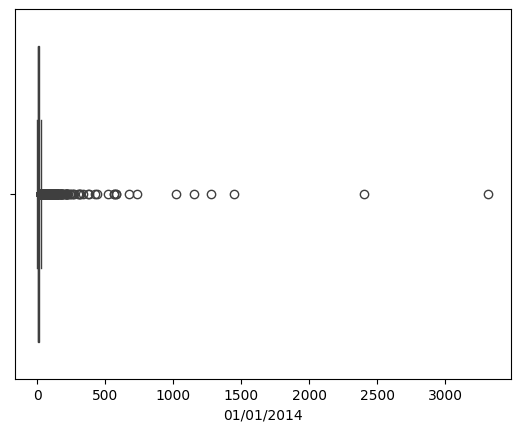

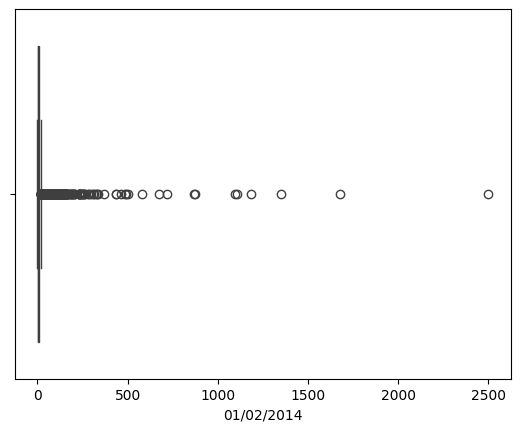

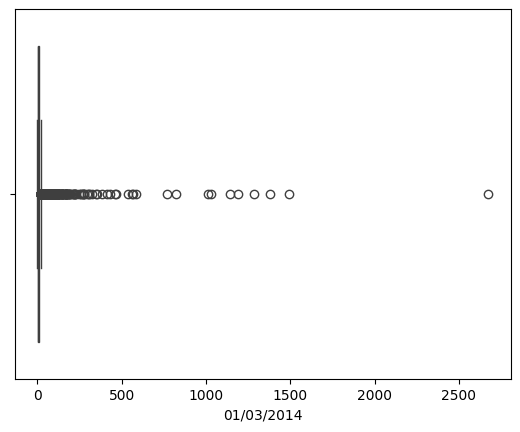

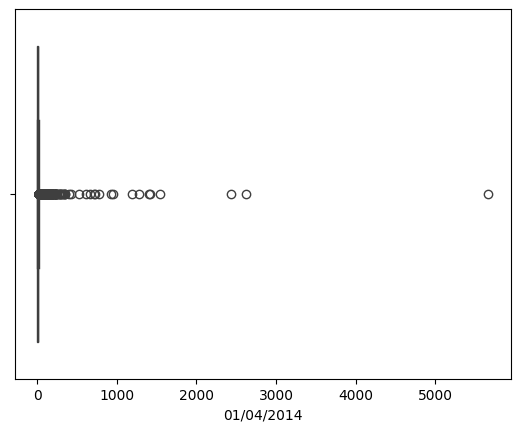

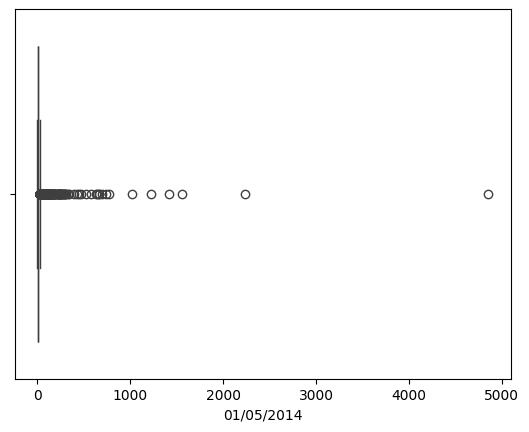

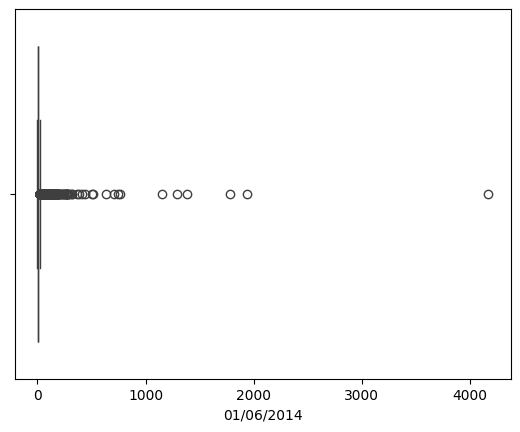

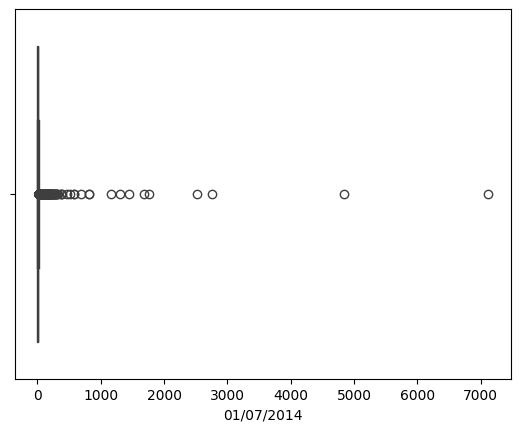

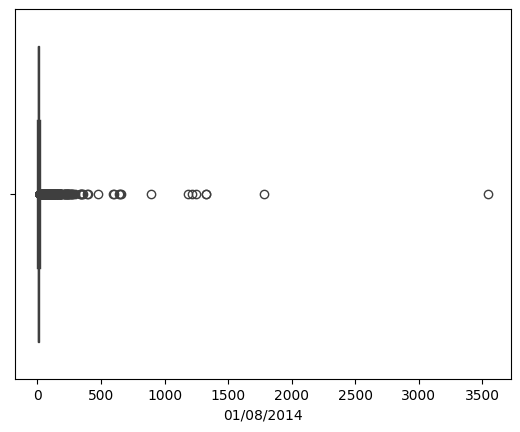

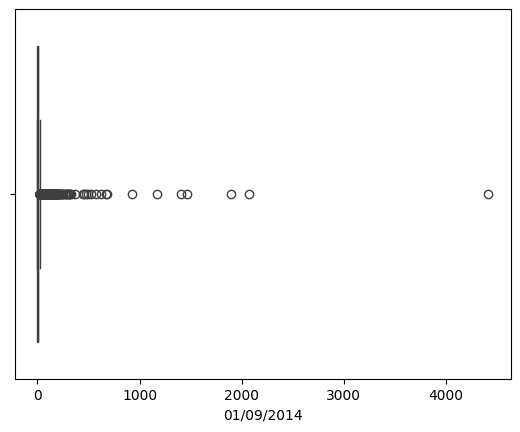

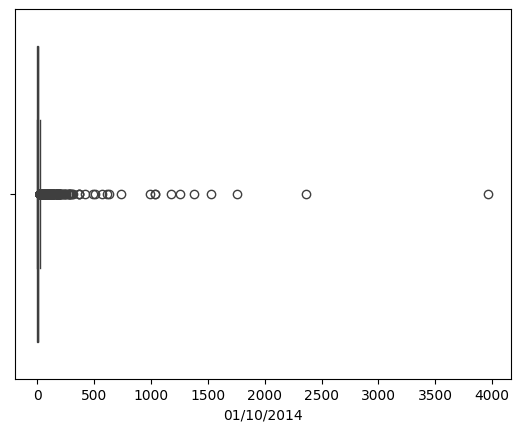

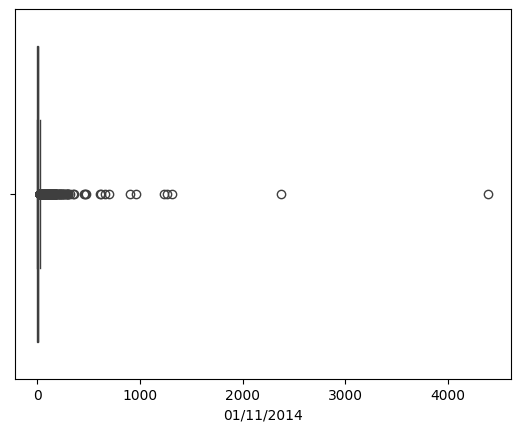

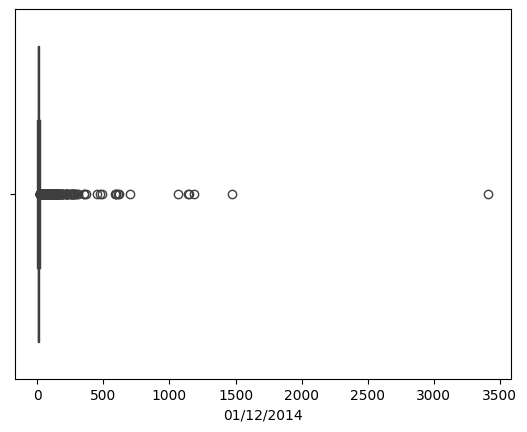

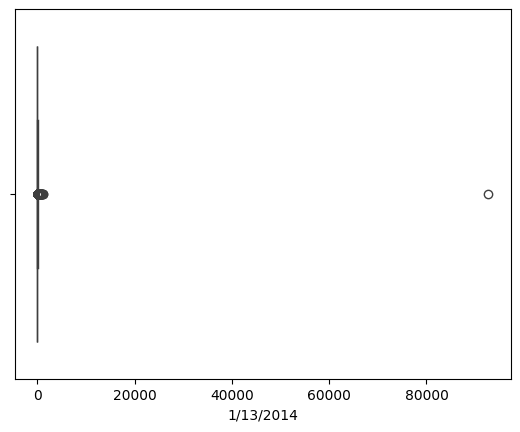

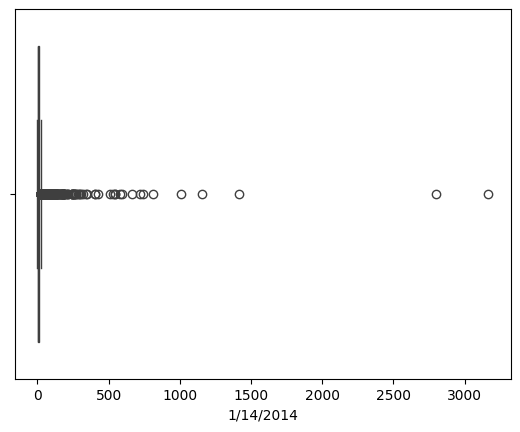

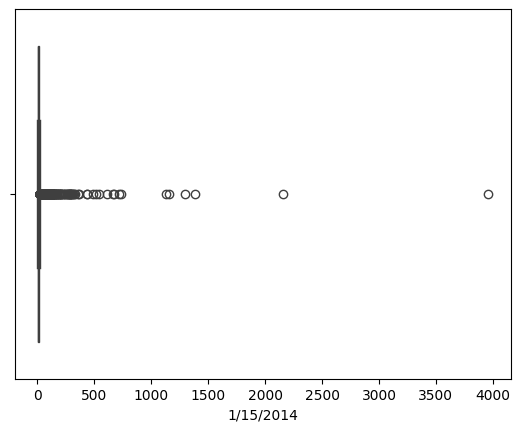

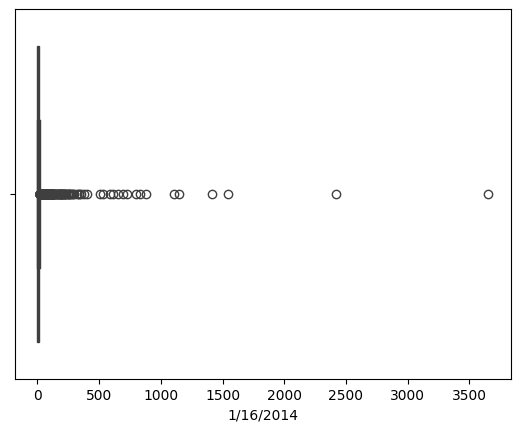

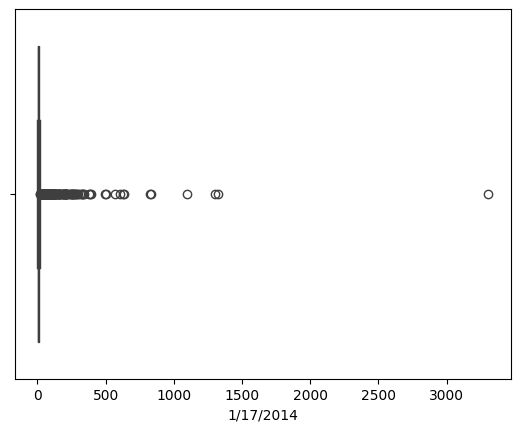

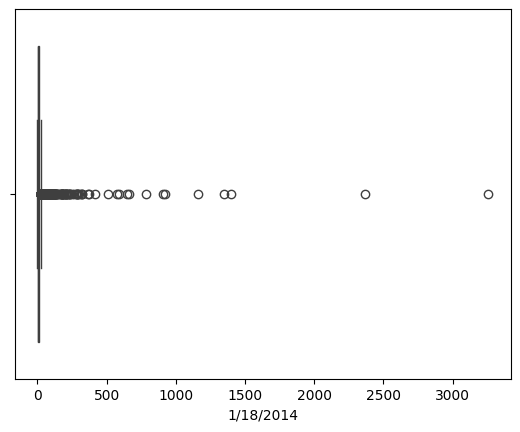

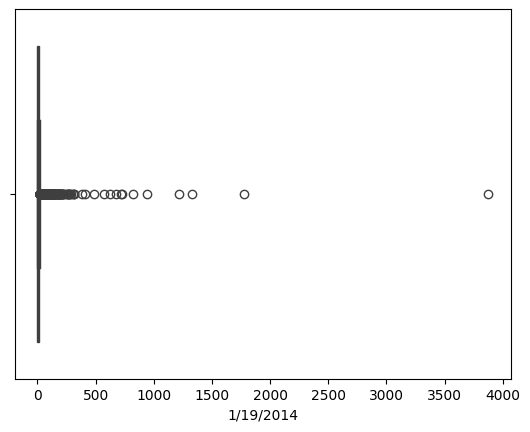

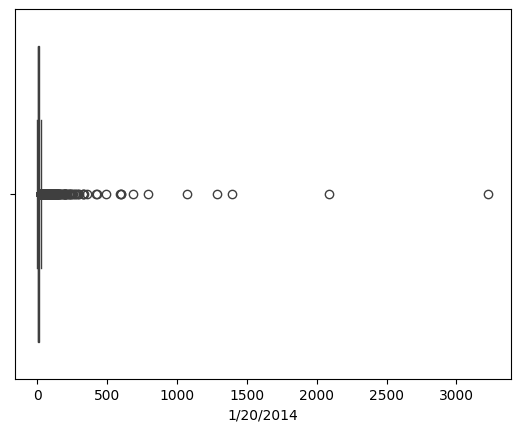

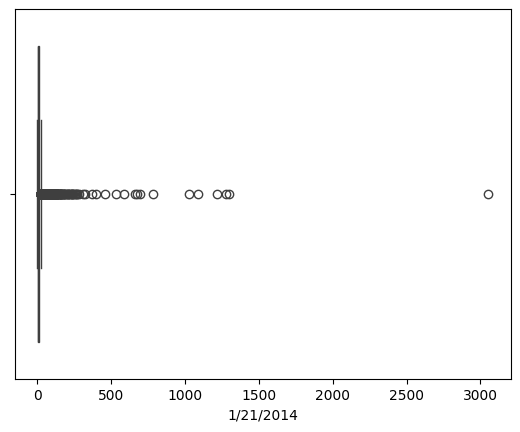

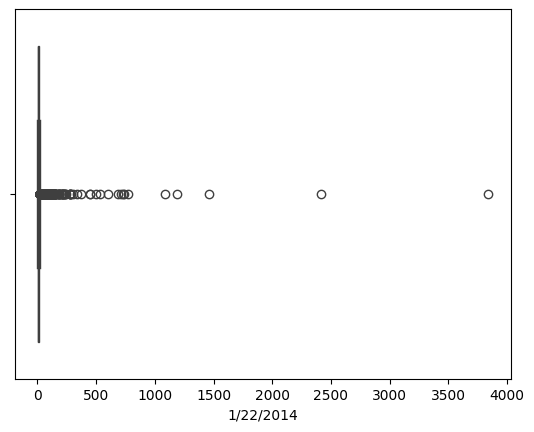

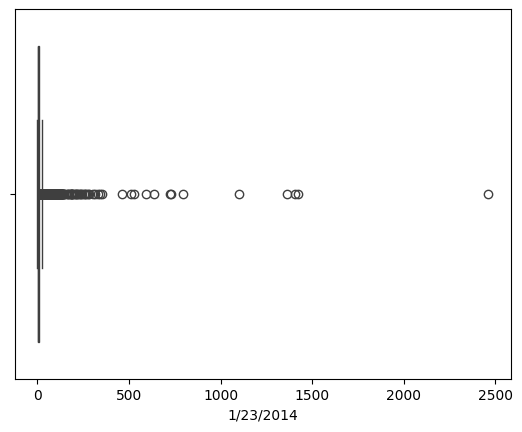

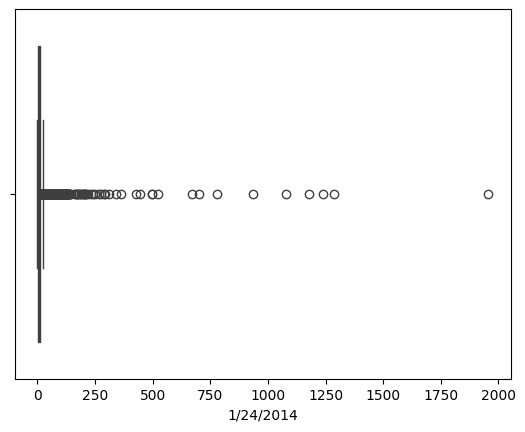

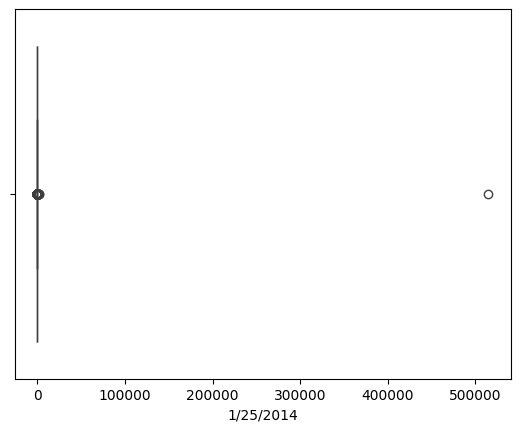

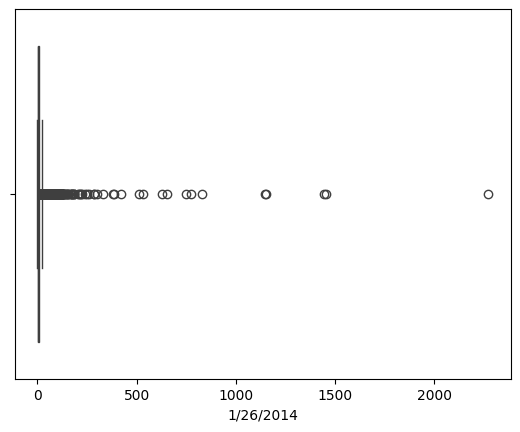

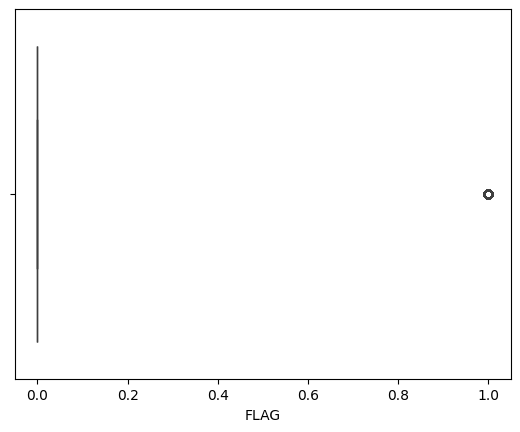

In [ ]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

In [ ]:
print(df['1/13/2014'].max())
print(df['1/25/2014'].max())

92713.9
514991.78


Dapat dilihat dari grafik, pada kolom 1/13/2014, Nilai paling besar sangat jauh dari dataset lainnya dan tidak memungkinkan, yaitu lebih dari 80000. Pada 1/25/2014, Nilai paling besar adalah lebih dari 500000, sangat jauh dari data lain.

### 2.2.3 EDA Univariate Analysis

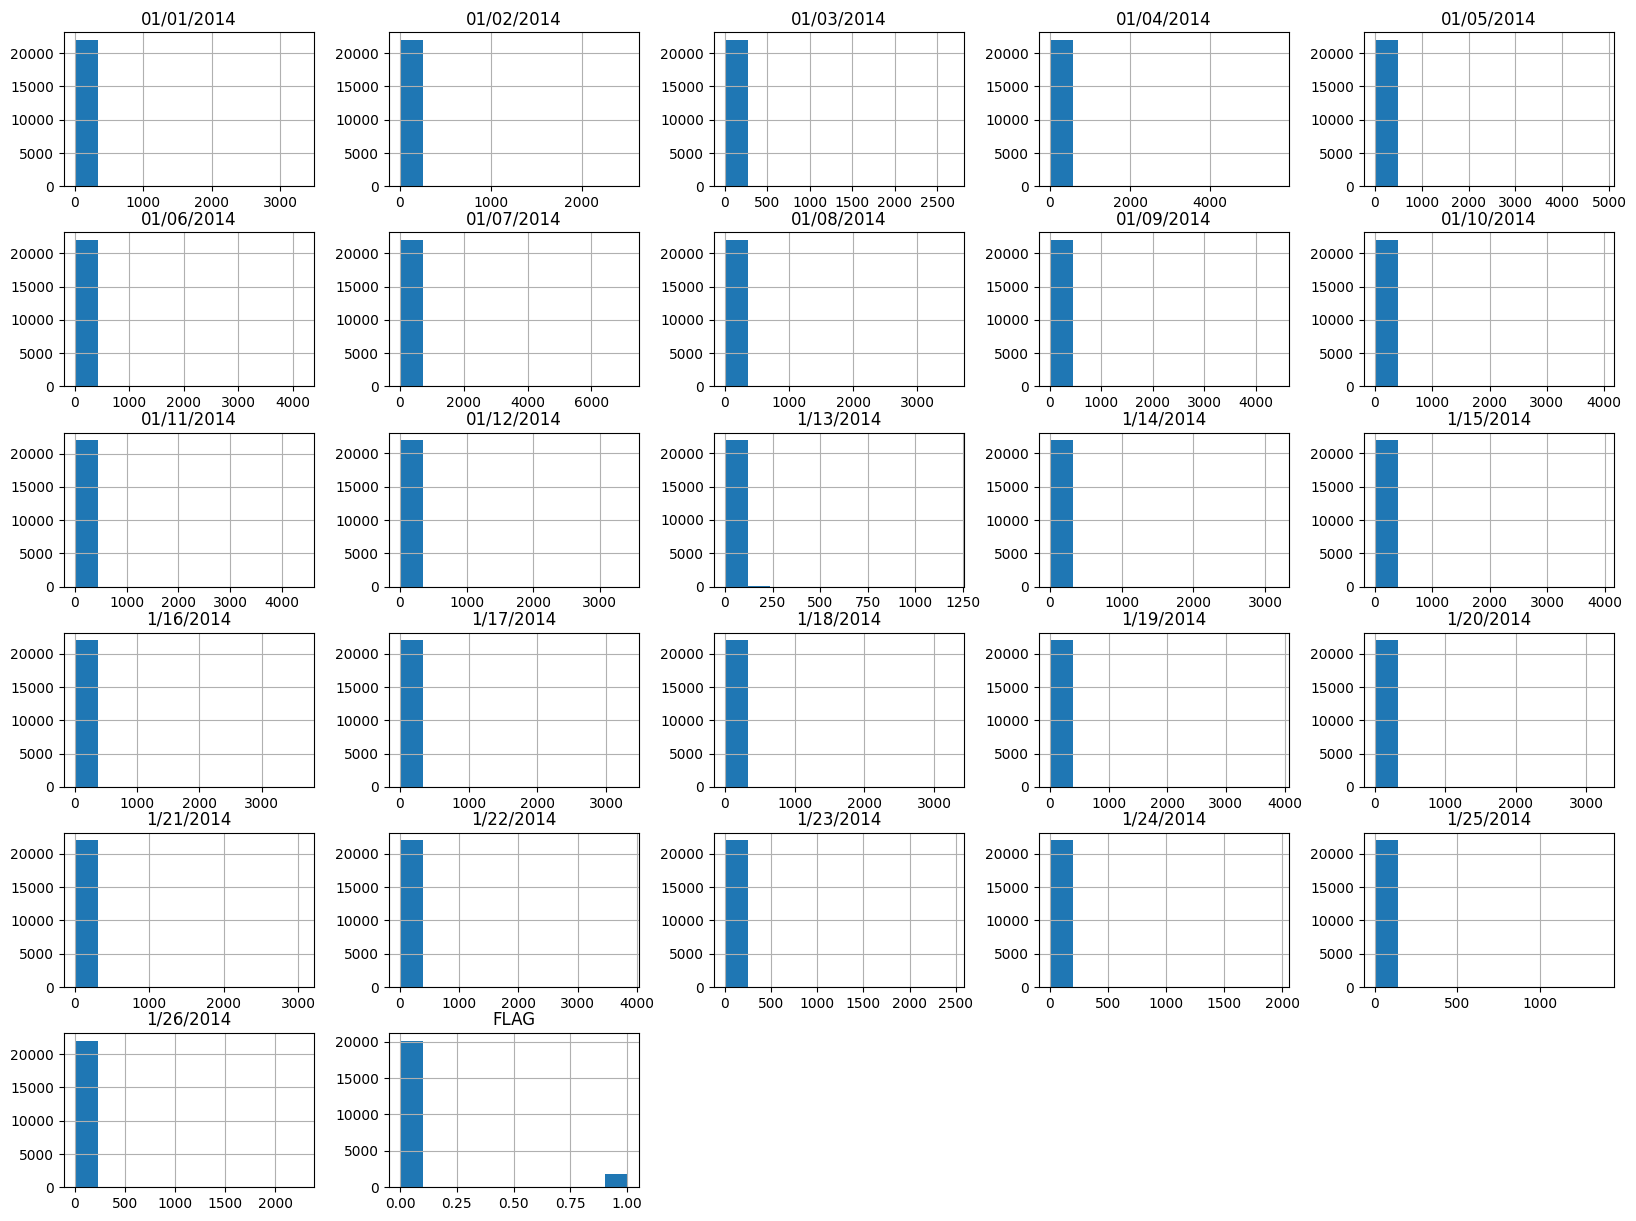

In [ ]:
df.hist(bins=10, figsize=(20,15))
plt.show()

Text(0.5, 1.0, 'Matriks Korelasi ')

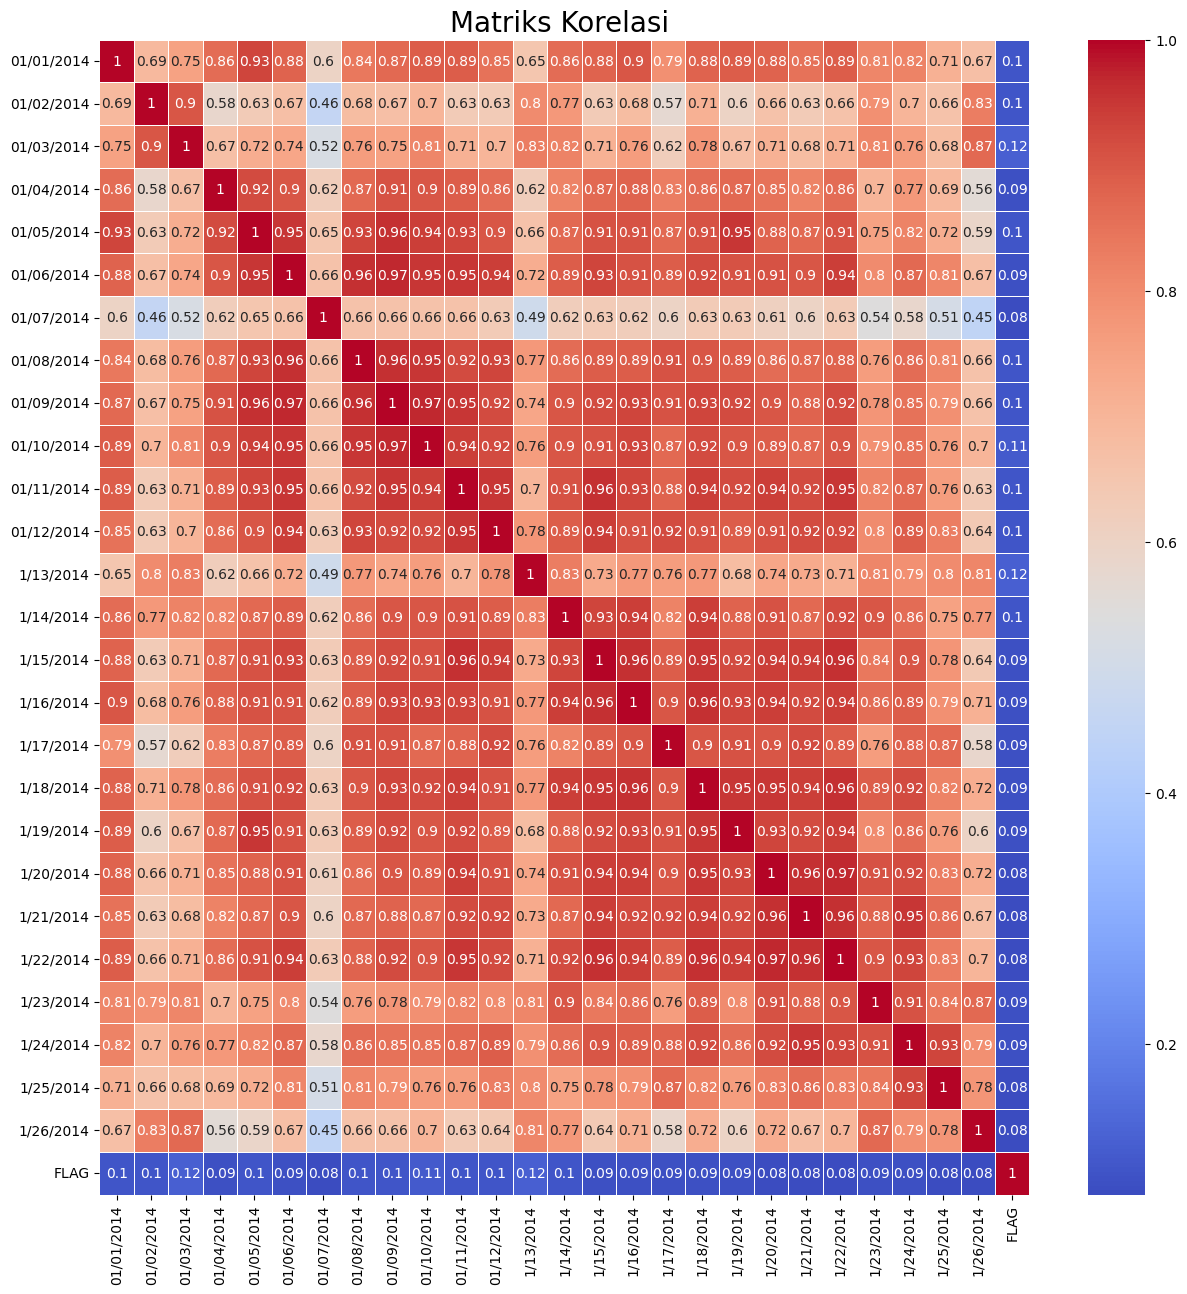

In [ ]:
plt.figure(figsize=(15, 15))
correlation_matrix = df.corr().round(2)

sns.heatmap(data=correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5, )
plt.title(f"Matriks Korelasi ", size=20)

Pada data terdapat imbalance data yang dapat membuat model machine learning tidak dapat memprediksi data yang sedikit dengan baik.

In [ ]:
class_counts = df['FLAG'].value_counts()
class_counts

,count
FLAG,
0,20152
1,1889


Text(0.5, 1.0, 'Data Imbalance pada terdeteksi atau tidak')

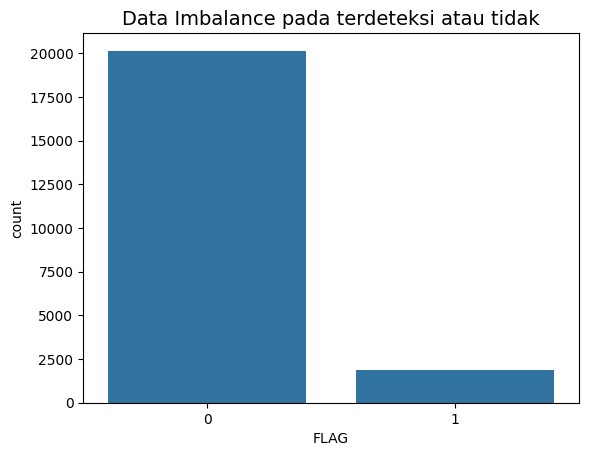

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

X, y = df.iloc[:, :-1], df['FLAG']

sns.countplot(x=df['FLAG'])
plt.title('Data Imbalance pada terdeteksi atau tidak', fontsize=14)

### 3. Data Preparation
#### 3.1 Data Cleaning

Melakukan drop terhadap duplicates.

In [ ]:
df.drop_duplicates(inplace=True)

In [ ]:
df.duplicated().sum()

0

Melakukan interpolasi untuk mengisi data yang kosong

In [ ]:
df.interpolate(method='linear', inplace=True)

 Kita gunakan interpolasi dengan metode linear, karena dataset merupakan penggunaan listrik setiap hari selama sebulan kita dapat menggunakan interpolasi linear untuk mengisi kosongnya data.

In [ ]:
df.isnull().sum()

,0
01/01/2014,0
01/02/2014,0
01/03/2014,0
01/04/2014,0
01/05/2014,0
01/06/2014,0
01/07/2014,0
01/08/2014,0
01/09/2014,0
01/10/2014,0


Melakukan drop terhadap outlier yang terlalu besar.

In [ ]:
max_value_index=df['1/13/2014'].idxmax()
df = df.drop(index=max_value_index)
max_value_index=df['1/25/2014'].idxmax()
df = df.drop(index=max_value_index)

Kita cek apakah outlier sudah dihapus

<ipython-input-16-5e49c2bb3870>:3: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


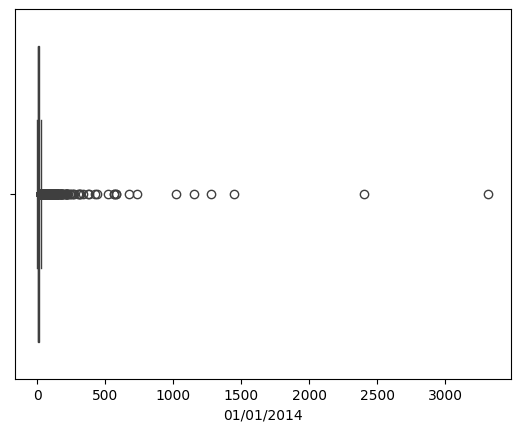

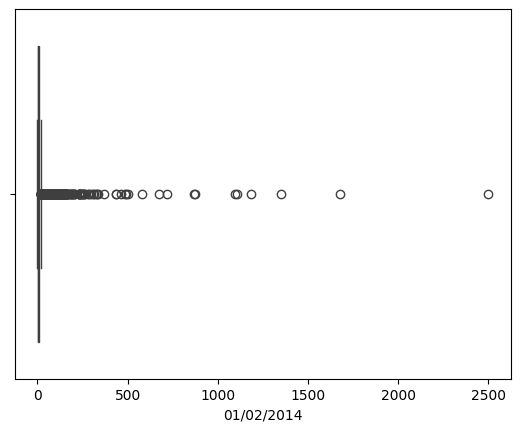

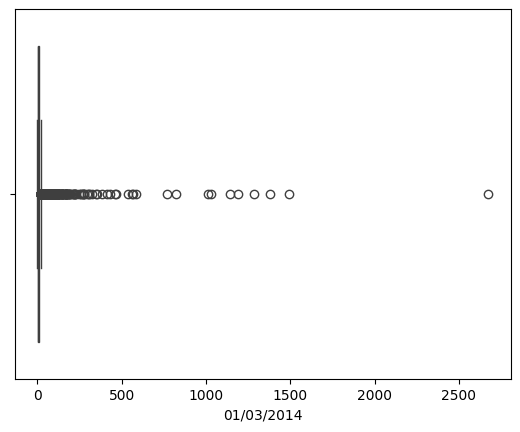

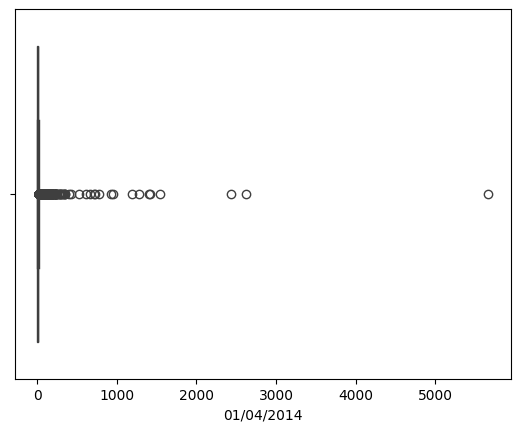

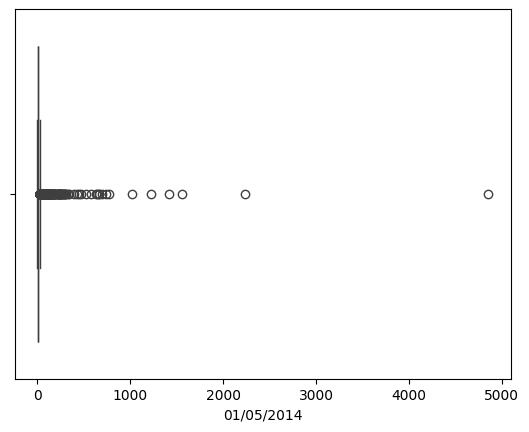

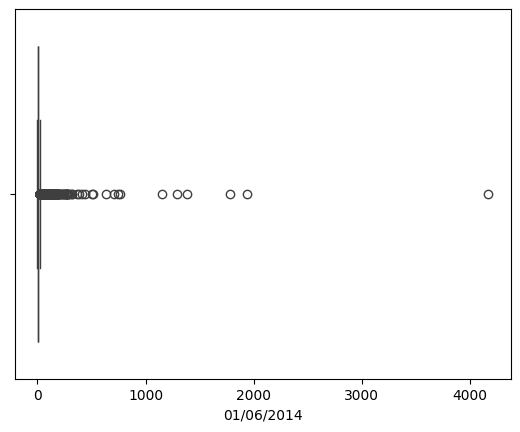

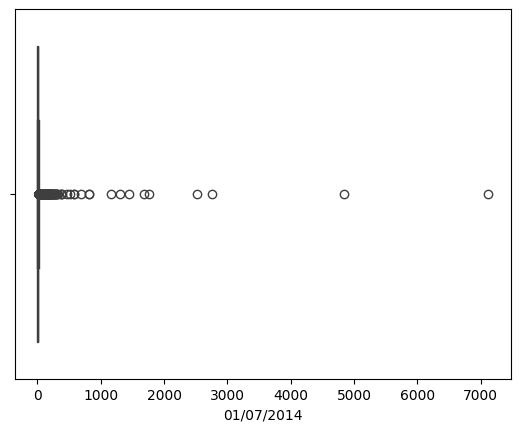

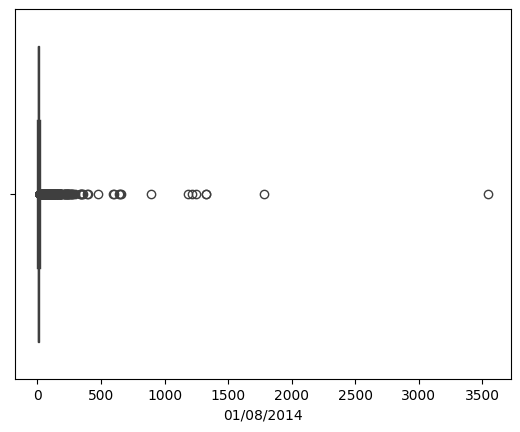

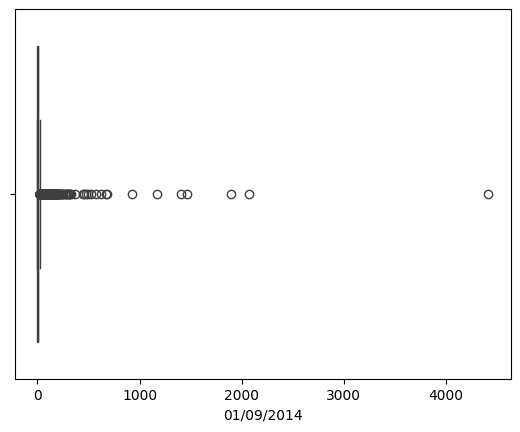

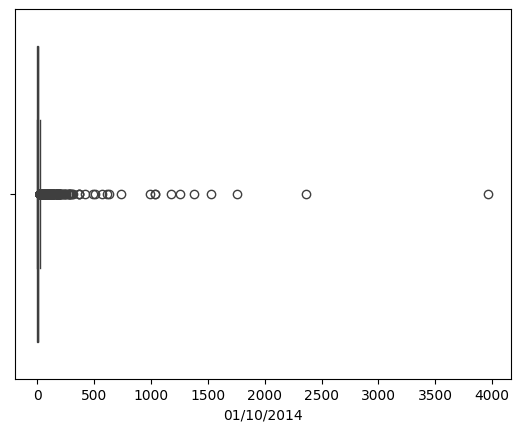

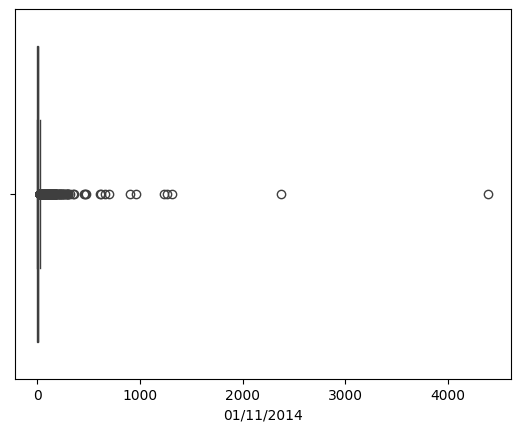

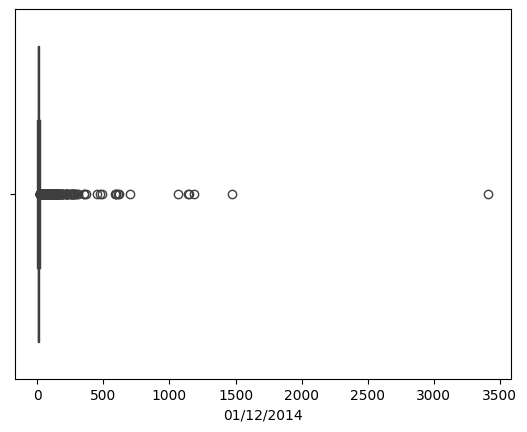

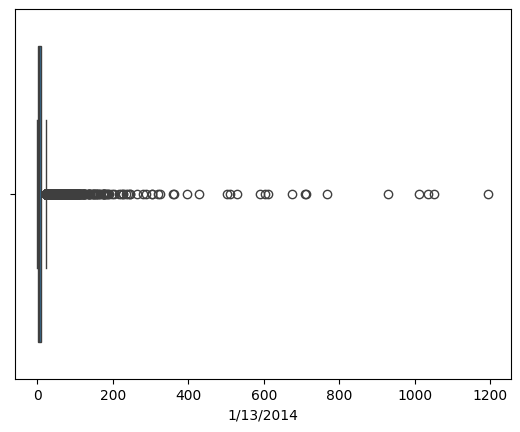

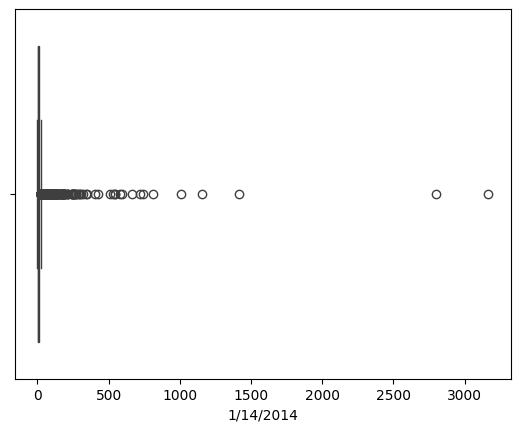

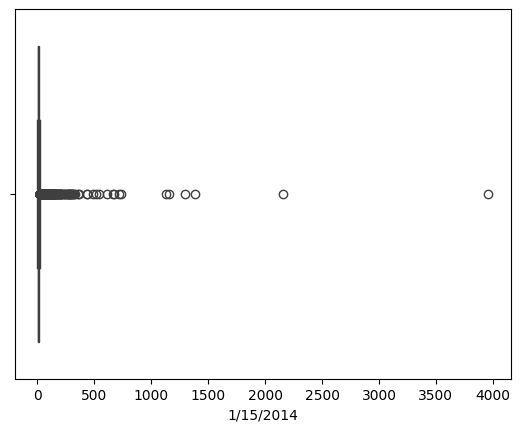

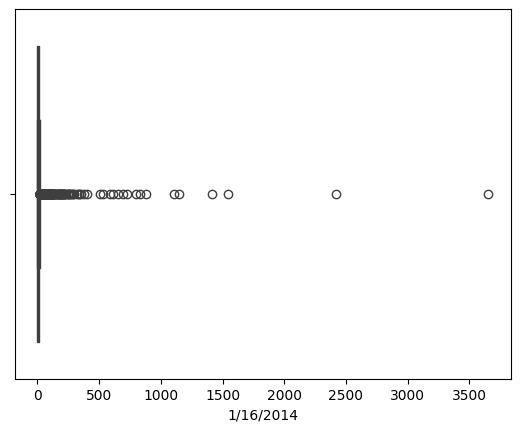

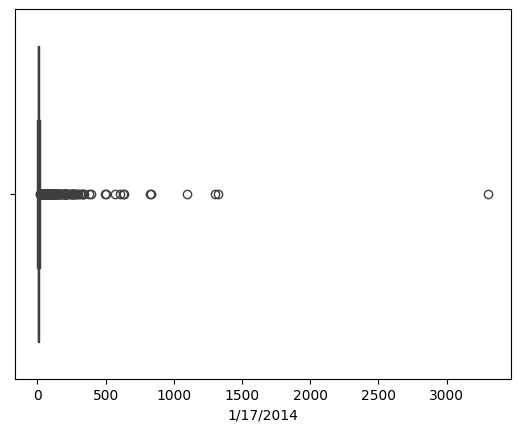

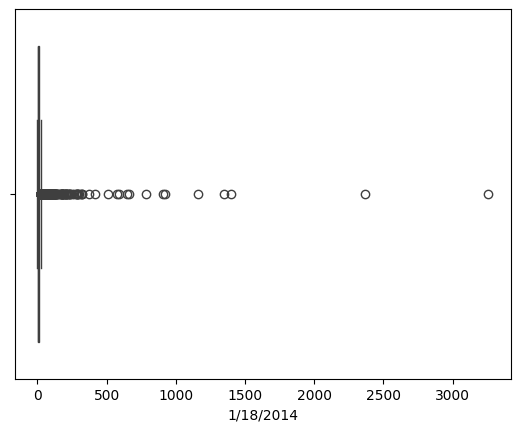

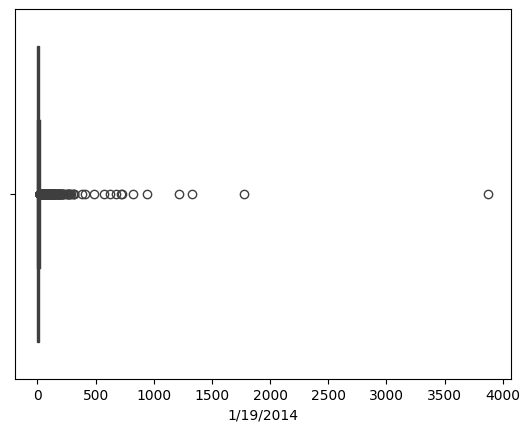

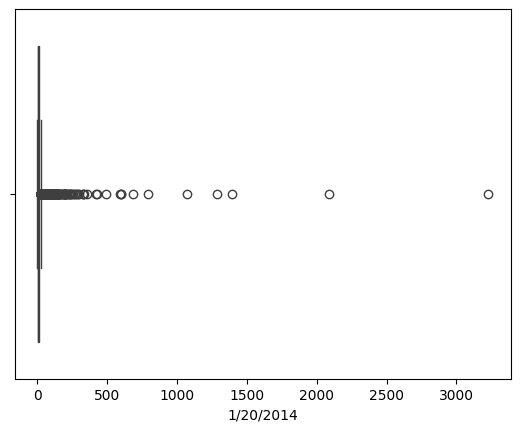

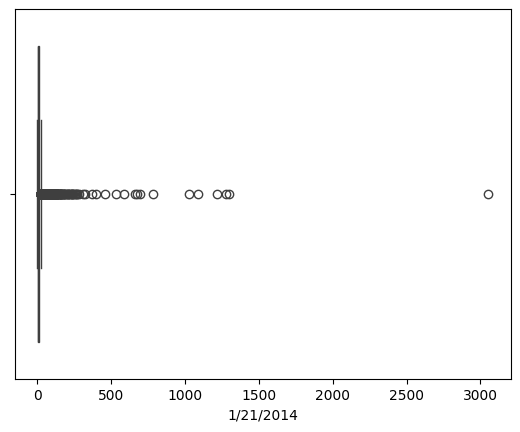

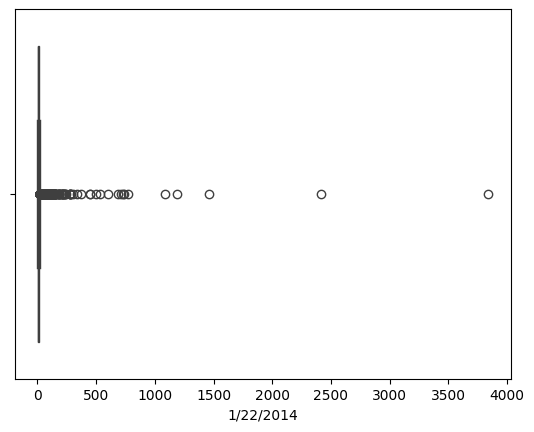

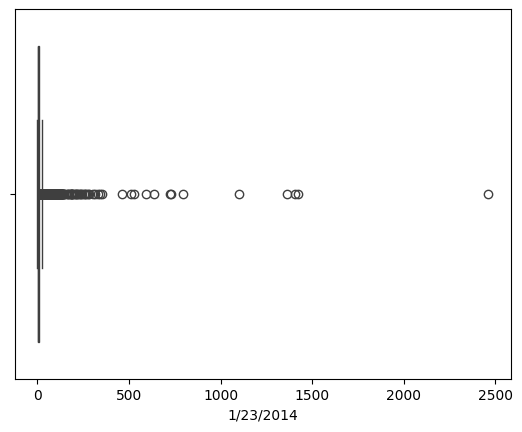

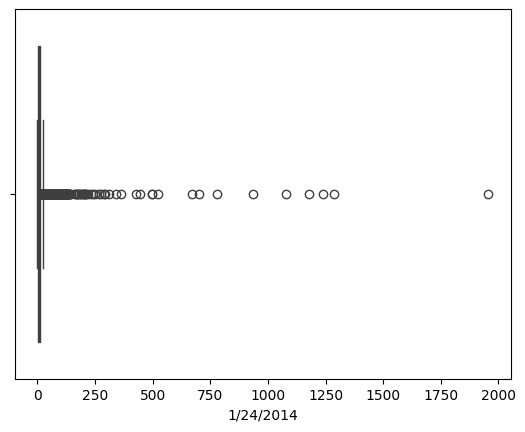

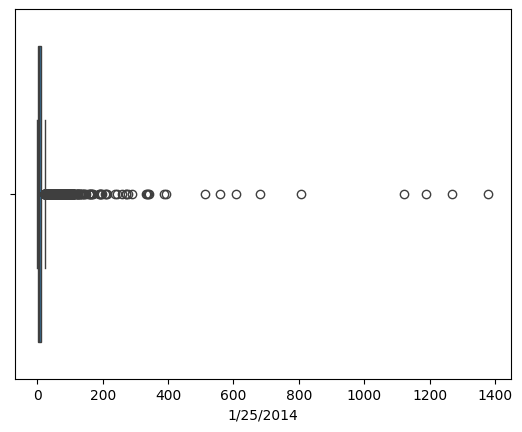

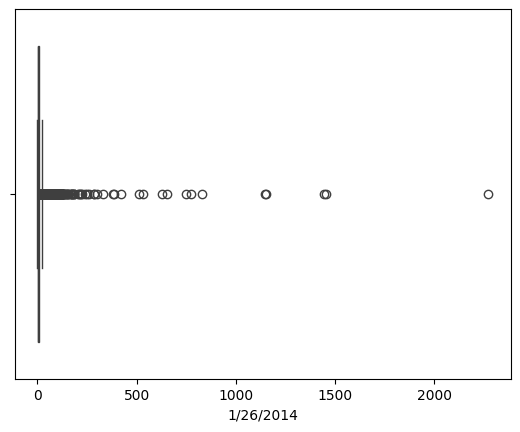

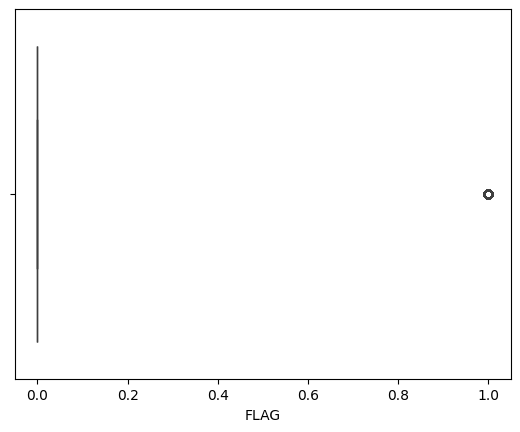

In [ ]:
df_outlier=df.select_dtypes(exclude=['object'])
for column in df_outlier:
        plt.figure()
        sns.boxplot(data=df_outlier, x=column)

#### 3.2 Data Balancing
Untuk mengatasi data imbalance, kita dapat menggunakan [LORAS](https://github.com/zoj613/pyloras) untuk mengatasinya. Metode LORAS membantu mengatasi masalah ketidakseimbangan kelas yang dapat terjadi dalam dataset. Hal ini sangat penting terutama saat menangani peristiwa langka, seperti anomali grid ekstrem atau pola konsumsi yang tidak biasa. LORAS berfungsi menyeimbangkan dataset dengan membuat titik data sintetis di dekat batas antara berbagai kelas. Metode ini dapat meningkatkan kinerja model machine learning untuk analisis prediktif dan mendeteksi outlier dalam konteks aktivitas jaringan listrik pada dataset SGCC.

In [ ]:
loras = pyloras.LORAS()
X, y = df.iloc[:, :-1], df['FLAG']
X_balanced, y_balanced = loras.fit_resample(X, y)

Text(0.5, 1.0, 'Data Balanced pada terdeteksi atau tidak')

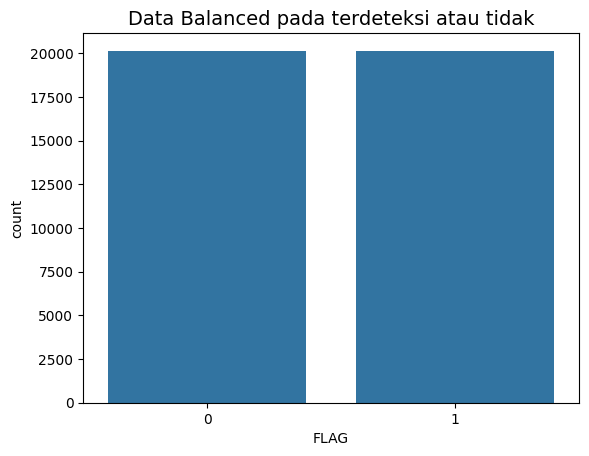

In [ ]:
sns.countplot(x=y_balanced)
plt.title('Data Balanced pada terdeteksi atau tidak', fontsize=14)

#### 3.3 Train-Test-Split

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_balanced, y_balanced, test_size=0.2, random_state=42)

In [ ]:
print(f'Total datasets: {len(X_balanced)}')
print(f'Total data Latih: {len(X_train)}')
print(f'Total data Uji: {len(X_test)}')

Total datasets: 40304
Total data Latih: 32243
Total data Uji: 8061


## 4. Model Development
### 4.1 KNN (K-Nearest Neighbour)

In [ ]:
# Siapkan dataframe untuk analisis model
trainmodels = pd.DataFrame(index=['accuracy','recall','precision', 'F1'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
testmodels = pd.DataFrame(index=['accuracy','recall','precision', 'F1'],
                      columns=['KNN', 'RandomForest', 'Boosting'])

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

# Initialize KNeighborsClassifier with desired parameters
knn = KNeighborsClassifier(n_neighbors=10, n_jobs=-1)  # You can adjust 'n_neighbors' based on your dataset
knn.fit(X_train, y_train)

KNeighborsClassifier(n_jobs=-1, n_neighbors=10)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
y_pred = knn.predict(X_train)
trainmodels.loc['accuracy','KNN'] = accuracy_score(y_train, y_pred)
trainmodels.loc['recall','KNN'] = recall_score(y_train, y_pred)
trainmodels.loc['precision','KNN'] = precision_score(y_train, y_pred)
trainmodels.loc['F1','KNN'] = f1_score(y_train, y_pred)

#### 4.2 Random Forest

In [ ]:
from sklearn.ensemble import RandomForestClassifier
# buat model prediksi
RF = RandomForestClassifier(n_estimators=200, max_depth=10, random_state=55, n_jobs=-1)
RF.fit(X_train, y_train)

RandomForestClassifier(max_depth=10, n_estimators=200, n_jobs=-1,
                       random_state=55)

In [ ]:
trainmodels.loc['accuracy','RandomForest'] = accuracy_score(y_train, RF.predict(X_train))
trainmodels.loc['recall','RandomForest'] = recall_score(y_train, RF.predict(X_train))
trainmodels.loc['precision','RandomForest'] = precision_score(y_train, RF.predict(X_train))
trainmodels.loc['F1','RandomForest'] = f1_score(y_train, RF.predict(X_train))

### 4.3 Boosting Algorithm

In [ ]:
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
# Define the Bagging Classifier
boosting_model = AdaBoostClassifier(
    estimator=DecisionTreeClassifier(max_depth=10),  # Base estimator
    n_estimators=200,  # Number of boosting stages
    learning_rate=0.1,  # Step size
    random_state=42     # Random seed
)

# Train the model
boosting_model.fit(X_train, y_train)


AdaBoostClassifier(estimator=DecisionTreeClassifier(max_depth=10),
                   learning_rate=0.1, n_estimators=200, random_state=42)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score, classification_report, confusion_matrix
y_pred = boosting_model.predict(X_train)
trainmodels.loc['accuracy','Boosting'] = accuracy_score(y_train, y_pred)
trainmodels.loc['recall','Boosting'] = recall_score(y_train, y_pred)
trainmodels.loc['precision','Boosting'] = precision_score(y_train, y_pred)
trainmodels.loc['F1','Boosting'] = f1_score(y_train, y_pred)

### 5. Evaluasi Model

#### 5.1 Skor model

In [ ]:
trainmodels

,KNN,RandomForest,Boosting
accuracy,0.821326,0.745371,0.872096
recall,0.981601,0.972464,0.980607
precision,0.742908,0.668247,0.805391
F1,0.845736,0.792152,0.884404


Dapat dilihat dari hasil evaluasi terhadap test dataset, KNN memiliki hasil recall paling baik

In [ ]:
model_dict = {'KNN': knn, 'RandomForest': RF, 'Boosting': boosting_model}
for name, model in model_dict.items():
    y_pred = model.predict(X_test)
    testmodels.loc['accuracy',name] = accuracy_score(y_test, y_pred)
    testmodels.loc['recall',name] = recall_score(y_test, y_pred)
    testmodels.loc['precision',name] = precision_score(y_test, y_pred)
    testmodels.loc['F1',name] = f1_score(y_test, y_pred)
testmodels

,KNN,RandomForest,Boosting
accuracy,0.798412,0.739486,0.830418
recall,0.978593,0.965551,0.945128
precision,0.721124,0.666893,0.770512
F1,0.830358,0.788902,0.848934


#### 5.2 Grafik evaluasi

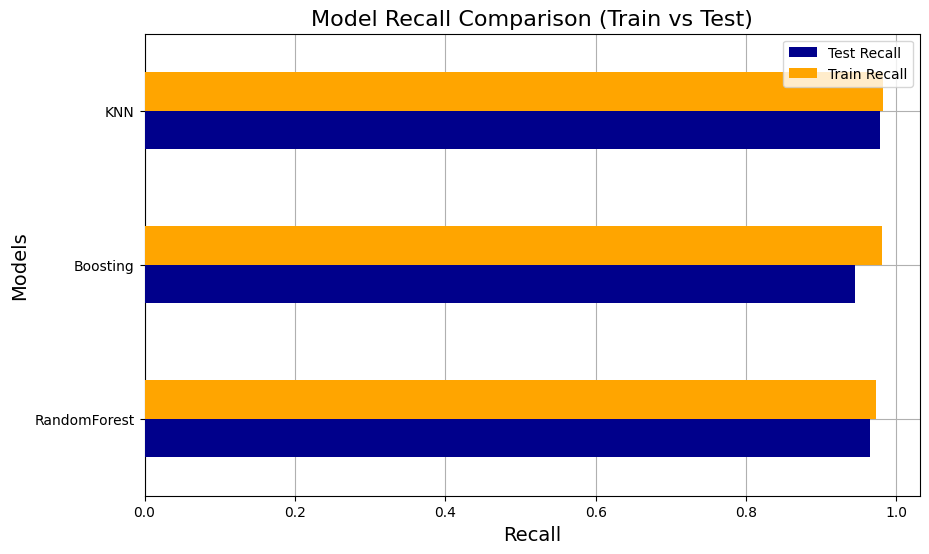

In [ ]:
train_recall = trainmodels.loc['recall']
test_recall = testmodels.loc['recall']
combined_accuracy = pd.DataFrame({
    'Test Recall': test_recall,
    'Train Recall': train_recall
})

combined_accuracy = combined_accuracy.sort_values(by='Train Recall', ascending=True)
fig, ax = plt.subplots(figsize=(10, 6))
combined_accuracy.plot(kind='barh', ax=ax, zorder=3, color=['darkblue', 'orange'])
ax.grid(zorder=0)
plt.title('Model Recall Comparison (Train vs Test)', fontsize=16)
plt.xlabel('Recall', fontsize=14)
plt.ylabel('Models', fontsize=14)
plt.show()

Dapat dilihat bahwa metode KNN merupakan metode paling bagus untuk memprediksi apakah ada pencurian listrik.